In [162]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [163]:
# Load the dataset
df = pd.read_csv('../Data/pre_BTC-USD.csv')
# data = df['Close'].values.reshape(-1, 1)

In [164]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Days_Since_Start
0,10385.000000,11052.299805,10352.700195,10951.000000,10951.000000,7317279744,0
1,10977.400391,11189.000000,10850.099609,11086.400391,11086.400391,7620590080,1
2,11101.900391,11528.200195,11002.400391,11489.700195,11489.700195,6690570240,2
3,11497.400391,11512.599609,11136.099609,11512.599609,11512.599609,6084149760,3
4,11532.400391,11704.099609,11443.900391,11573.299805,11573.299805,6468539904,4


In [165]:
# df = df[:1500]

In [166]:
df= df.drop(columns=["Open", "High", "Low", "Adj Close","Volume"])
df = df.rename(columns={'Close': 'Price'})
df = pd.DataFrame(data=df)
data = df

In [167]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train, test = data.iloc[:split_index], data.iloc[split_index:]

In [168]:
# Train ARIMA model
arima_model = ARIMA(train['Price'], order=(1, 1, 1))
arima_result = arima_model.fit()

In [169]:
# Predict with ARIMA
arima_pred = arima_result.predict(start=0, end=len(train) + len(test) - 1, typ='levels')

c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [170]:
# Prepare data for machine learning model
# train['Days_Since_Start'] = np.arange(len(train))
# test['Days_Since_Start'] = np.arange(len(train), len(train) + len(test))

In [171]:
# # Train Random Forest model
# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(train[['Days_Since_Start']], train['Price'])
# # Predict with Random Forest
# rf_pred = rf_model.predict(data[['Days_Since_Start']])

In [172]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(train[['Days_Since_Start']], train['Price'])
# Predict with Linear Regression
lr_pred = lr_model.predict(data[['Days_Since_Start']])

In [173]:
# Decision Tree model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(train[['Days_Since_Start']], train['Price'])
# Predict with Decision Tree model
dt_pred = dt.predict(data[['Days_Since_Start']])

In [174]:
# # Bagging cho RandomForest và LinearRegression
# bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
# bagging_linear = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42)

# # Huấn luyện mô hình Bagging
# bagging_dt.fit(train[['Days_Since_Start']], train['Price'])
# bagging_linear.fit(train[['Days_Since_Start']], train['Price'])

In [175]:
# dt_bagging_forecast = bagging_dt.predict(data[['Days_Since_Start']])
# linear_bagging_forecast = bagging_linear.predict(data[['Days_Since_Start']])

In [176]:
ensemble_pred = (arima_pred + dt_pred + lr_pred) / 3
# ensemble_pred = (arima_pred + dt_bagging_forecast + linear_bagging_forecast) / 3

In [177]:
# # Đánh giá mô hình
# mae = mean_absolute_error(test['Price'], ensemble_pred)
# rmse = np.sqrt(mean_squared_error(test['Price'], ensemble_pred))

# print(f'Mean Absolute Error: {mae}')
# print(f'Root Mean Squared Error: {rmse}')

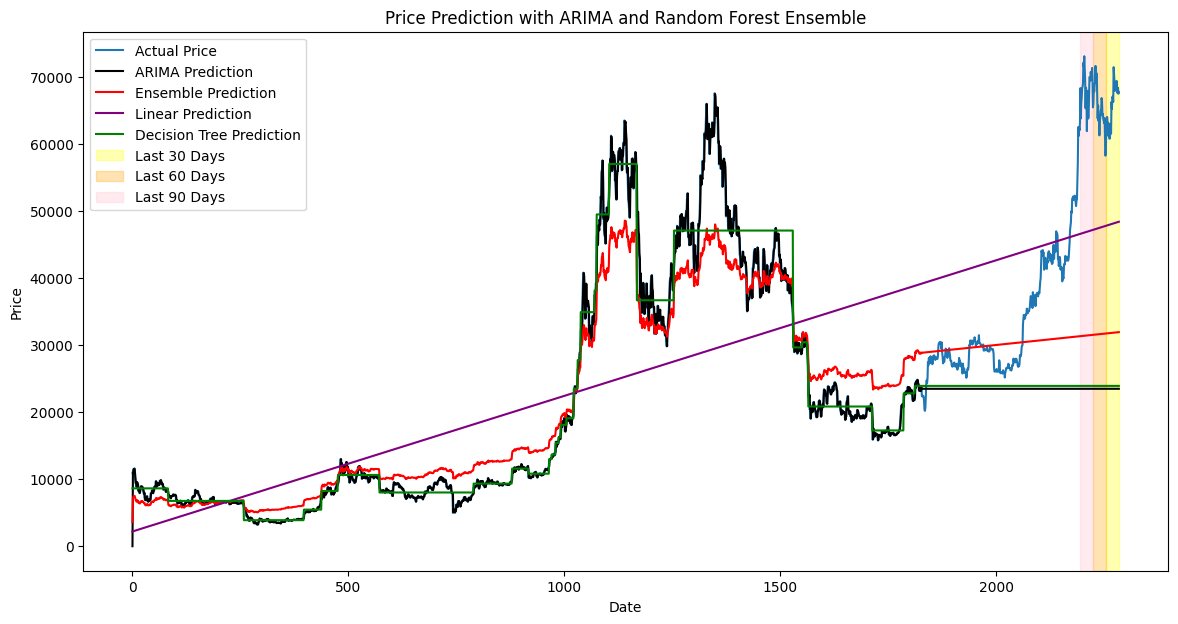

In [178]:
# Plot the predictions for all data for bagging
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Actual Price')
plt.plot(data.index, arima_pred, color='black', label='ARIMA Prediction')
# plt.plot(data.index, rf_pred, color='green', label='Random Forest Prediction')
plt.plot(data.index, ensemble_pred, color='red', label='Ensemble Prediction')
plt.plot(data.index, lr_pred, color='purple', label='Linear Prediction')
plt.plot(data.index, dt_pred, color='green', label='Decision Tree Prediction')


# Highlight the last 30, 60, 90 days predictions
plt.axvspan(test.index[-30], test.index[-1], color='yellow', alpha=0.3, label='Last 30 Days')
plt.axvspan(test.index[-60], test.index[-30], color='orange', alpha=0.3, label='Last 60 Days')
plt.axvspan(test.index[-90], test.index[-60], color='pink', alpha=0.3, label='Last 90 Days')


plt.legend()
plt.title('Price Prediction with ARIMA and Random Forest Ensemble')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

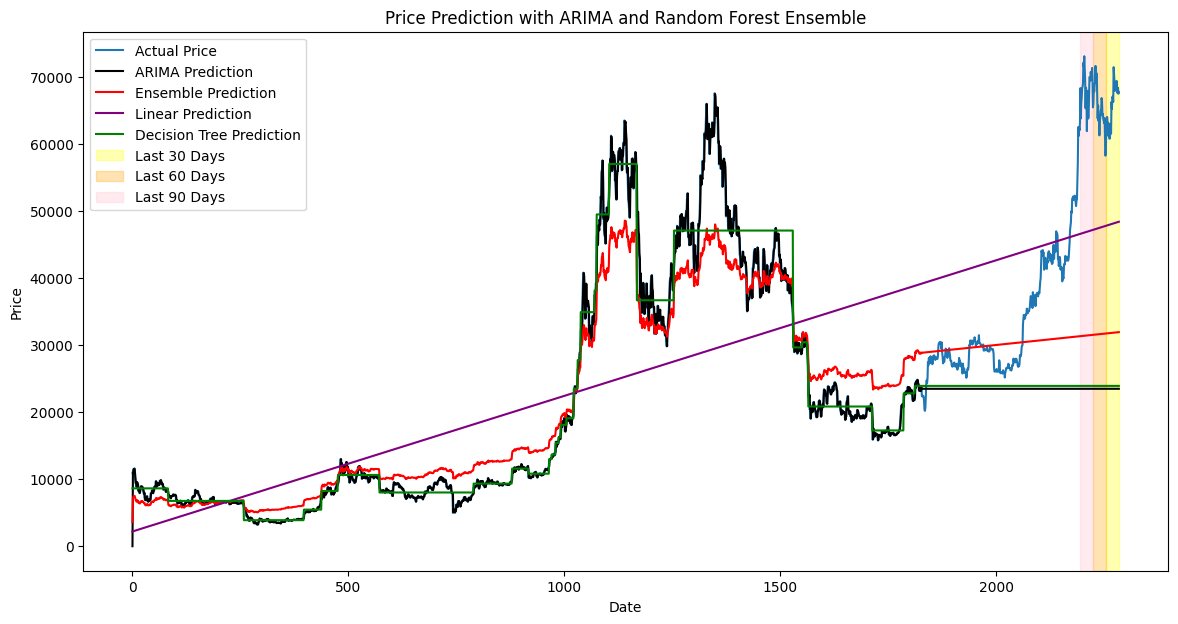

In [179]:
# Plot the predictions for all data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Actual Price')
plt.plot(data.index, arima_pred, color='black', label='ARIMA Prediction')
# plt.plot(data.index, rf_pred, color='green', label='Random Forest Prediction')
plt.plot(data.index, ensemble_pred, color='red', label='Ensemble Prediction')
plt.plot(data.index, lr_pred, color='purple', label='Linear Prediction')
plt.plot(data.index, dt_pred, color='green', label='Decision Tree Prediction')


# Highlight the last 30, 60, 90 days predictions
plt.axvspan(test.index[-30], test.index[-1], color='yellow', alpha=0.3, label='Last 30 Days')
plt.axvspan(test.index[-60], test.index[-30], color='orange', alpha=0.3, label='Last 60 Days')
plt.axvspan(test.index[-90], test.index[-60], color='pink', alpha=0.3, label='Last 90 Days')


plt.legend()
plt.title('Price Prediction with ARIMA and Random Forest Ensemble')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (457,) and (2285,)

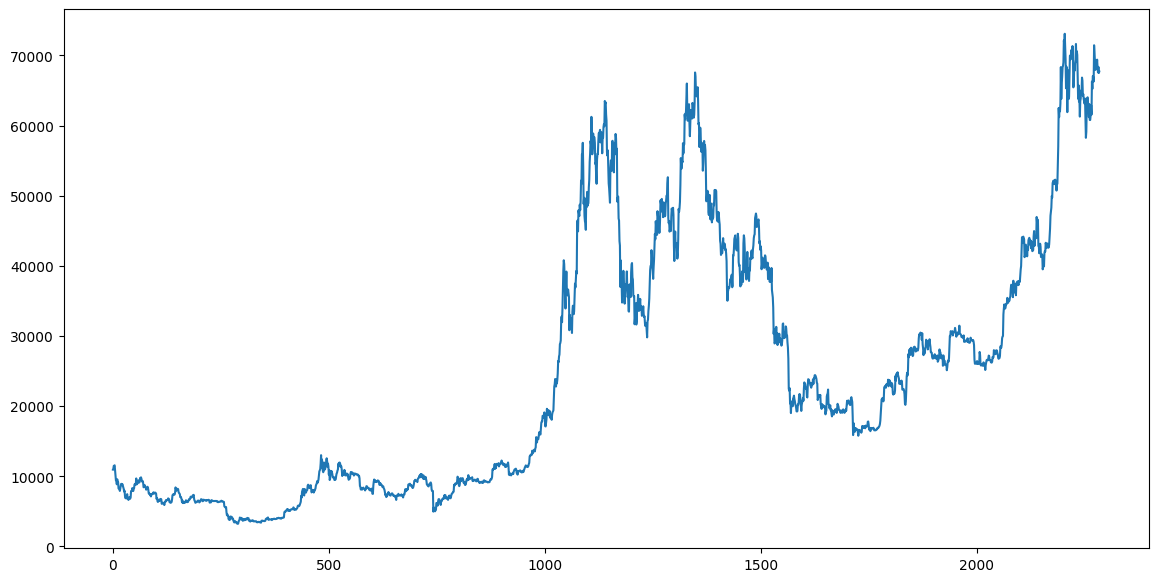

In [180]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Actual Price')
plt.plot(test.index, arima_pred, color='blue', label='ARIMA Prediction')
plt.plot(test.index, rf_pred, color='green', label='Random Forest Prediction')
plt.plot(test.index, ensemble_pred, color='red', label='Ensemble Prediction')

# Highlight the last 30, 60, 90 days predictions
plt.axvspan(test.index[-30], test.index[-1], color='yellow', alpha=0.3, label='Last 30 Days')
plt.axvspan(test.index[-60], test.index[-30], color='orange', alpha=0.3, label='Last 60 Days')
plt.axvspan(test.index[-90], test.index[-60], color='pink', alpha=0.3, label='Last 90 Days')

plt.legend()
plt.title('Price Prediction with ARIMA and Random Forest Ensemble')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()